## 📋 Table of Contents
* [Import and first glance](#import)
* [Feature Distributions](#feature)
* [Feature Correlation](#feature_corr)
* [Target](#target)

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

In [2]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# random seed
my_random_seed = 111

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

<a id='import'></a>
# Import and first glance

In [3]:
# load data
t1 = time.time()
df_train = pd.read_csv('../input/spotify-popularity-prediction-v2/train.csv')
df_test = pd.read_csv('../input/spotify-popularity-prediction-v2/test.csv')
df_sub = pd.read_csv('../input/spotify-popularity-prediction-v2/spotify_sample_submission.csv')
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

Elapsed time [s]: 1.4825


In [4]:
# preview
df_train.head(5)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [5]:
# structure of data - train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

In [6]:
# structure of data - test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058 entries, 0 to 43057
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                43058 non-null  object 
 1   artists           43058 non-null  object 
 2   name              43058 non-null  object 
 3   year              43058 non-null  int64  
 4   acousticness      43058 non-null  float64
 5   danceability      43058 non-null  float64
 6   duration_ms       43058 non-null  int64  
 7   energy            43058 non-null  float64
 8   explicit          43058 non-null  int64  
 9   instrumentalness  43058 non-null  float64
 10  key               43058 non-null  int64  
 11  liveness          43058 non-null  float64
 12  loudness          43058 non-null  float64
 13  mode              43058 non-null  int64  
 14  release_date      43058 non-null  object 
 15  speechiness       43058 non-null  float64
 16  tempo             43058 non-null  float6

In [7]:
# basic stats - train
df_train.describe(include='all')

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
count,129172,129172,129172,129172.000000,129172.000000,129172.000000,1.291720e+05,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172,129172.000000,129172.000000,129172.000000,129172.000000
unique,129172,30429,106371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10199,NaN,NaN,NaN,NaN
top,7pQSmQ0l7QdBeL9X6CEMbH,['Tadeusz Dolega Mostowicz'],Winter Wonderland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN,NaN,NaN
freq,1,952,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1976.579762,0.501950,0.536076,2.328895e+05,0.481096,0.067956,0.194286,5.207050,0.211519,-11.767025,0.703868,NaN,0.105871,116.943154,0.525167,25.915539
std,NaN,NaN,NaN,26.722407,0.379088,0.175803,1.492669e+05,0.271778,0.251671,0.332443,3.516778,0.180989,5.679598,0.456552,NaN,0.182878,30.348323,0.264451,21.876377
min,NaN,NaN,NaN,1920.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1955.000000,0.091800,0.414000,1.662930e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.905000,0.000000,NaN,0.035100,93.755500,0.311000,1.000000
50%,NaN,NaN,NaN,1977.000000,0.523000,0.547000,2.056665e+05,0.463000,0.000000,0.000482,5.000000,0.138000,-10.868000,1.000000,NaN,0.045400,115.639500,0.537000,26.000000
75%,NaN,NaN,NaN,1998.000000,0.895000,0.668000,2.658400e+05,0.707000,0.000000,0.234000,8.000000,0.270000,-7.532000,1.000000,NaN,0.076300,135.014000,0.744000,42.000000


In [8]:
# basic stats - test
df_test.describe(include='all')

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
count,43058,43058,43058,43058.000000,43058.000000,43058.000000,4.305800e+04,43058.000000,43058.000000,43058.000000,43058.000000,43058.000000,43058.000000,43058.000000,43058,43058.000000,43058.000000,43058.000000
unique,43058,15033,39169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6955,NaN,NaN,NaN
top,6IfByzdeGt3iIsakTp16vz,['Tadeusz Dolega Mostowicz'],White Christmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN,NaN
freq,1,329,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352,NaN,NaN,NaN
mean,NaN,NaN,NaN,1976.588718,0.501808,0.536755,2.320188e+05,0.480667,0.067955,0.197013,5.196433,0.211025,-11.810043,0.700985,NaN,0.105971,116.921583,0.525497
std,NaN,NaN,NaN,26.667737,0.380314,0.176027,1.407200e+05,0.272797,0.251671,0.334557,3.521099,0.179675,5.721454,0.457832,NaN,0.183582,30.118065,0.264217
min,NaN,NaN,NaN,1920.000000,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1955.000000,0.089725,0.414000,1.659200e+05,0.246000,0.000000,0.000000,2.000000,0.099300,-15.034000,0.000000,NaN,0.035200,93.994000,0.312000
50%,NaN,NaN,NaN,1977.000000,0.523000,0.549000,2.058670e+05,0.462000,0.000000,0.000548,5.000000,0.138000,-10.866000,1.000000,NaN,0.045400,115.708000,0.537000
75%,NaN,NaN,NaN,1998.000000,0.899000,0.668000,2.649470e+05,0.708000,0.000000,0.247000,8.000000,0.271000,-7.531000,1.000000,NaN,0.075400,134.850000,0.744000


In [9]:
# define features and target
features_num = ['year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 
       'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']

features_cat = ['explicit', 'key', 'mode'] # author & name have too many categories...

target = 'popularity'

<a id='feature'></a>
# Feature Distributions

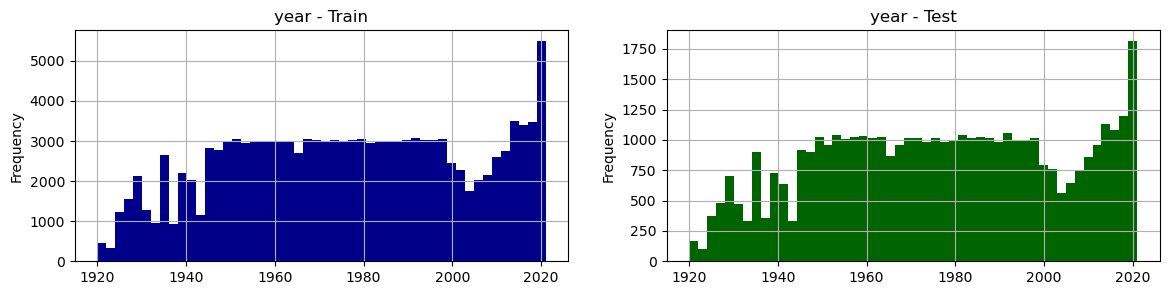

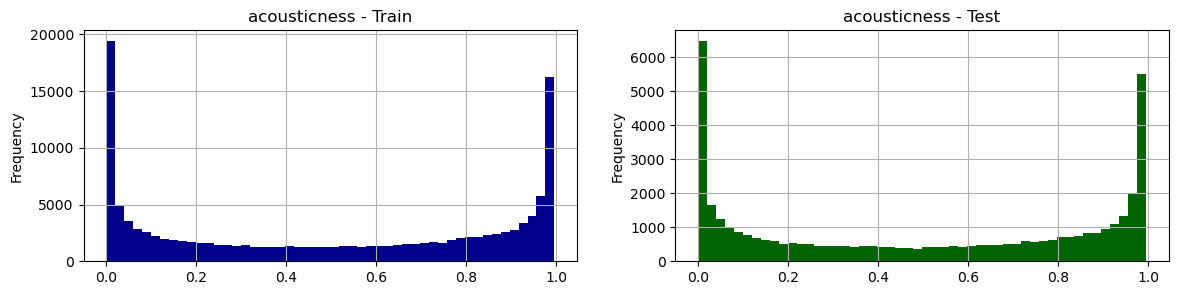

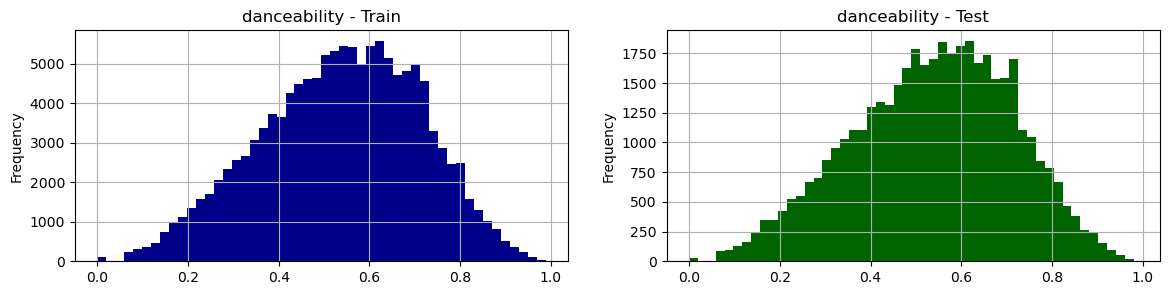

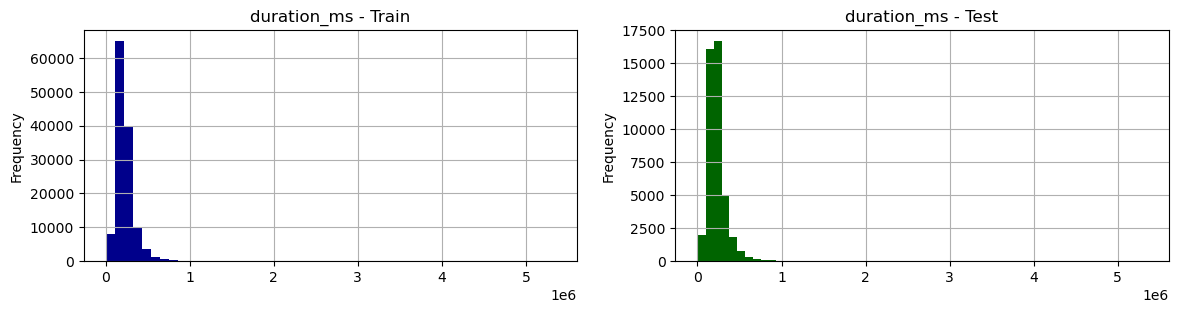

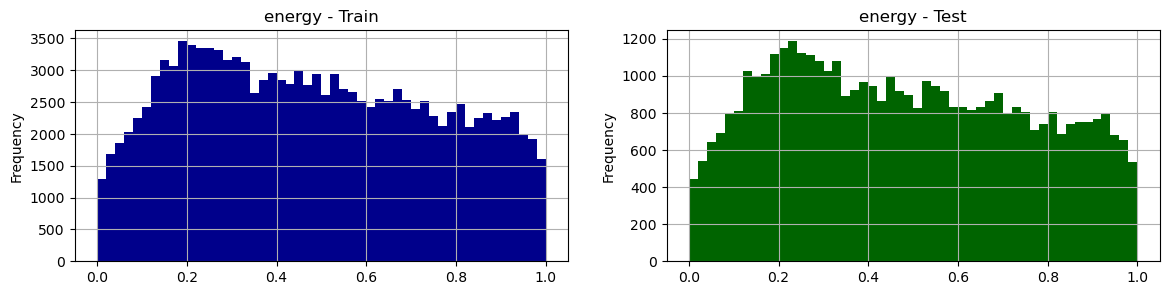

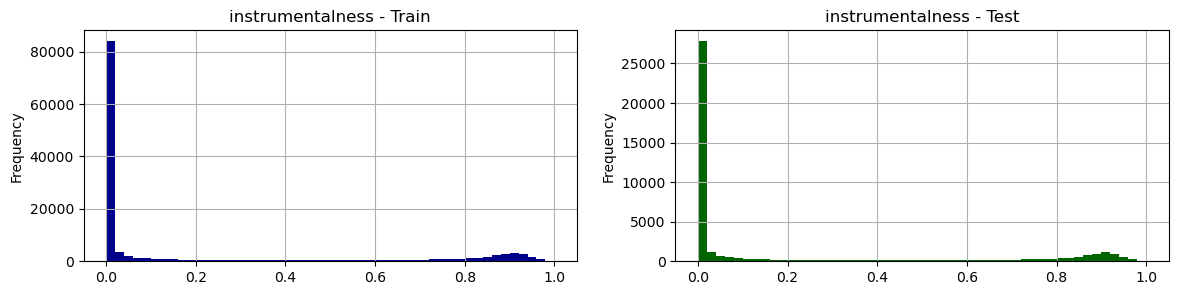

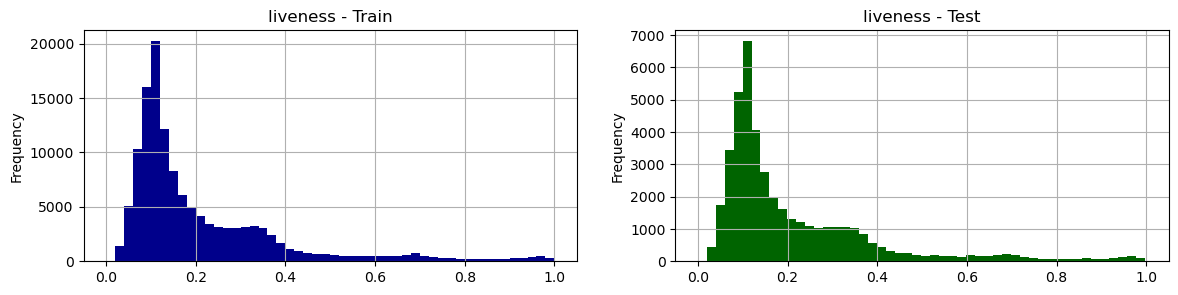

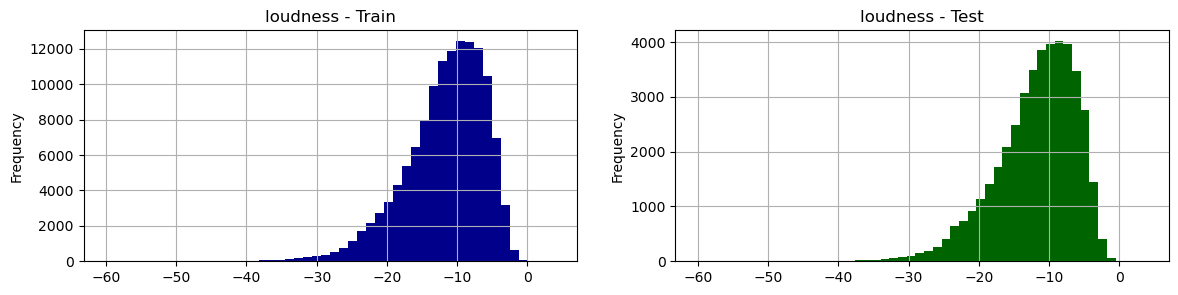

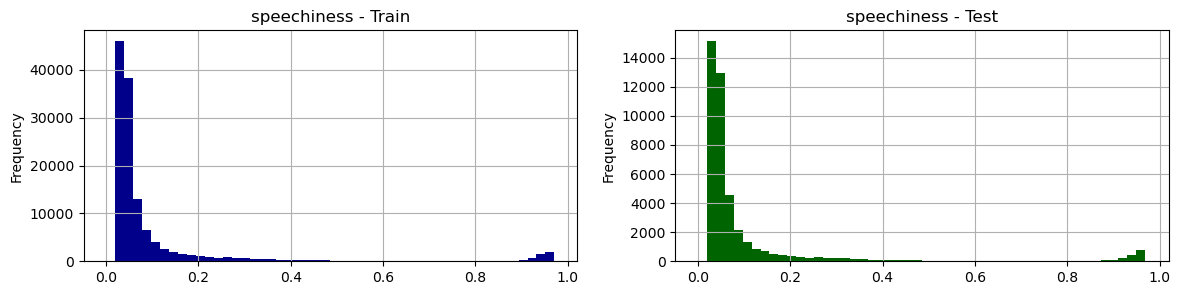

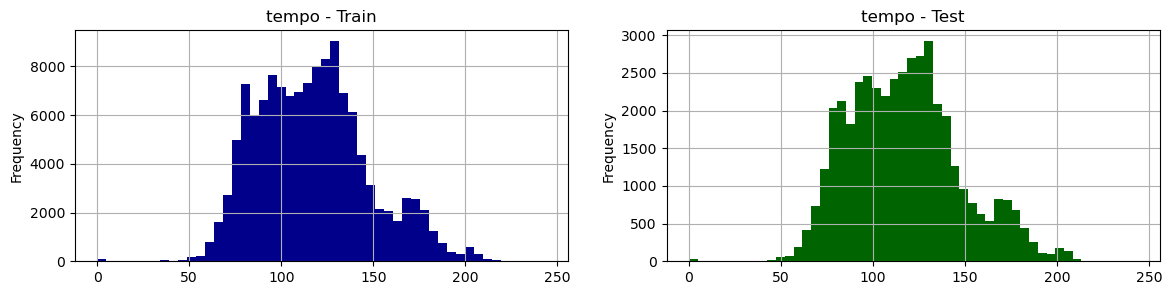

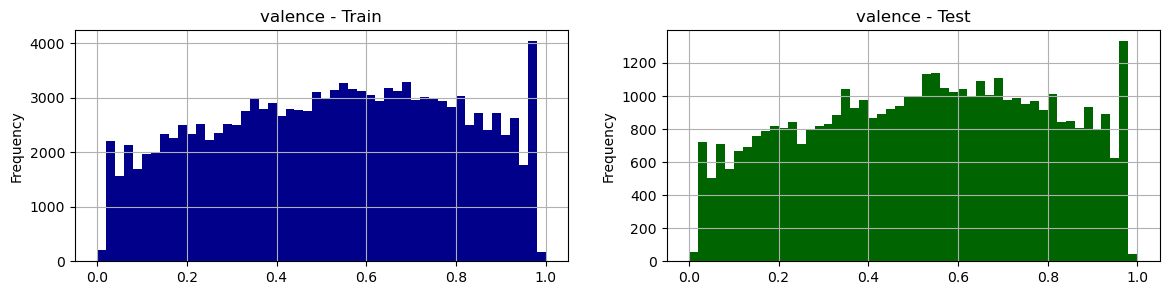

In [10]:
# plot histograms (train and test)
for f in features_num:
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].plot(kind='hist', bins=50, color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_test[f].plot(kind='hist', bins=50, color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

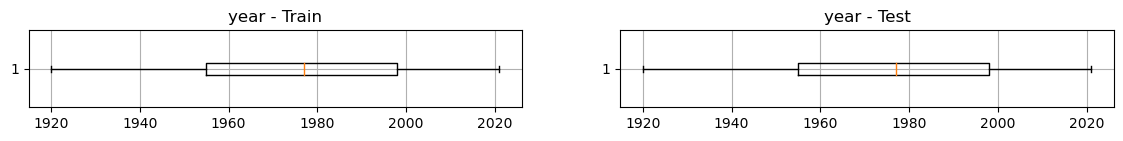

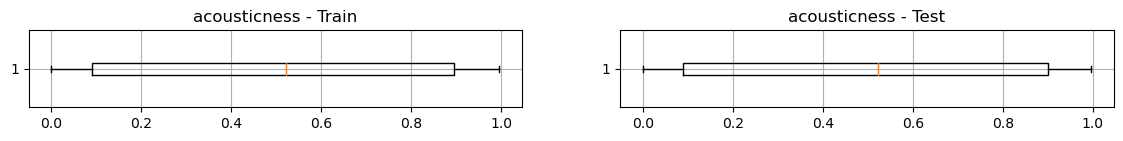

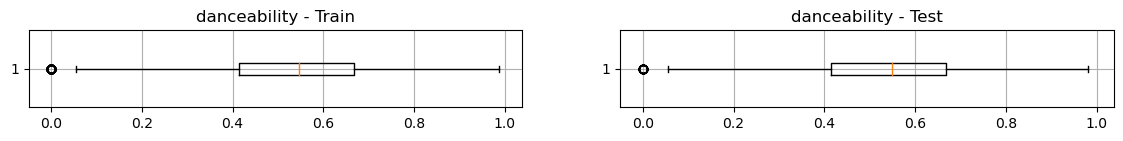

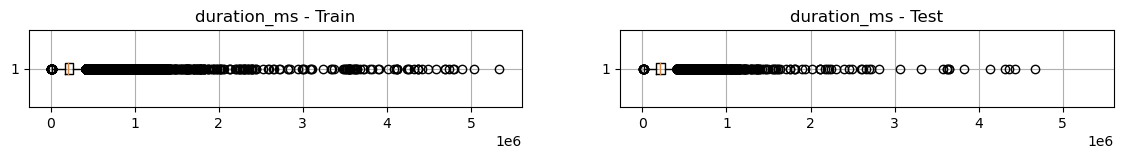

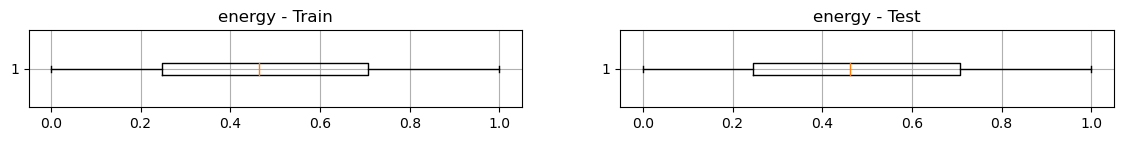

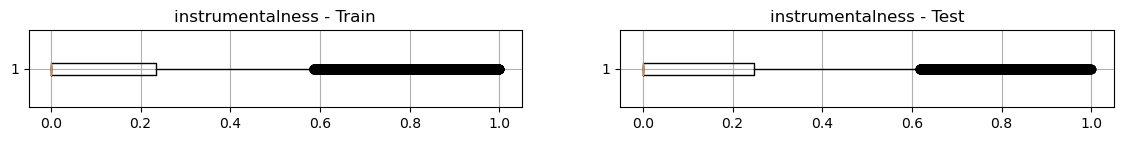

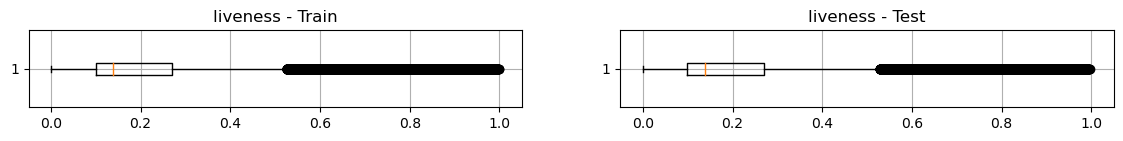

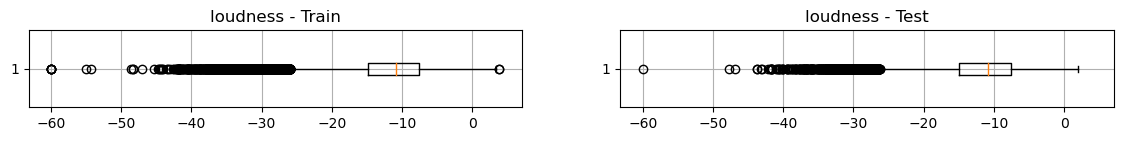

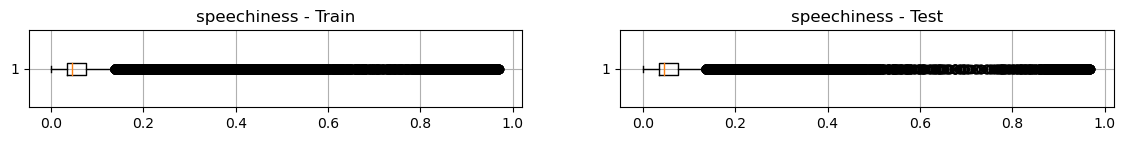

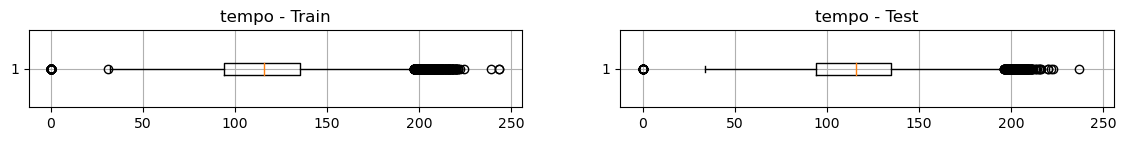

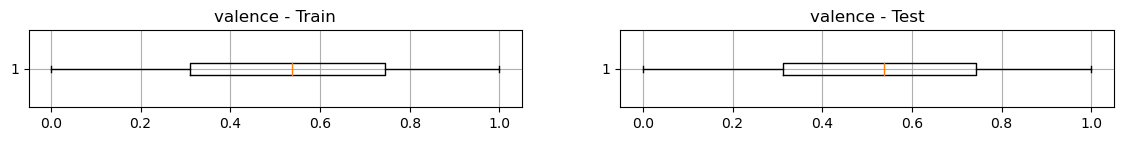

In [11]:
# boxplots (train and test)
for f in features_num:
    plt.figure(figsize=(14,1))
    ax1 = plt.subplot(1,2,1)
    df_temp = df_train[f].dropna() # boxplot does not like missings...
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_temp = df_test[f].dropna()
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

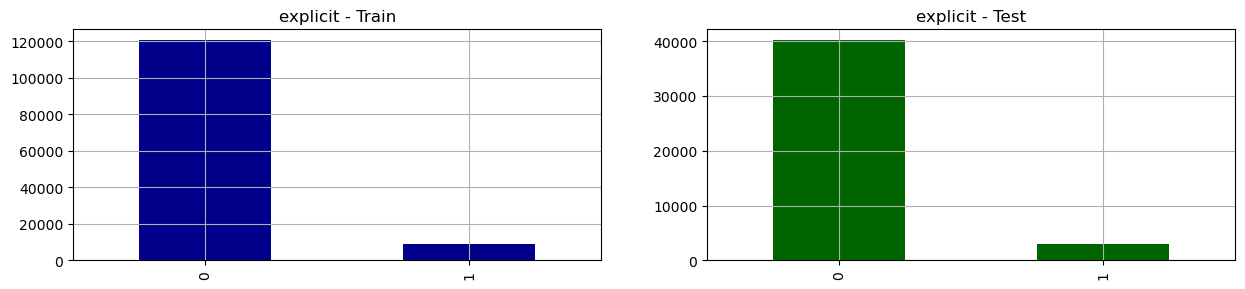

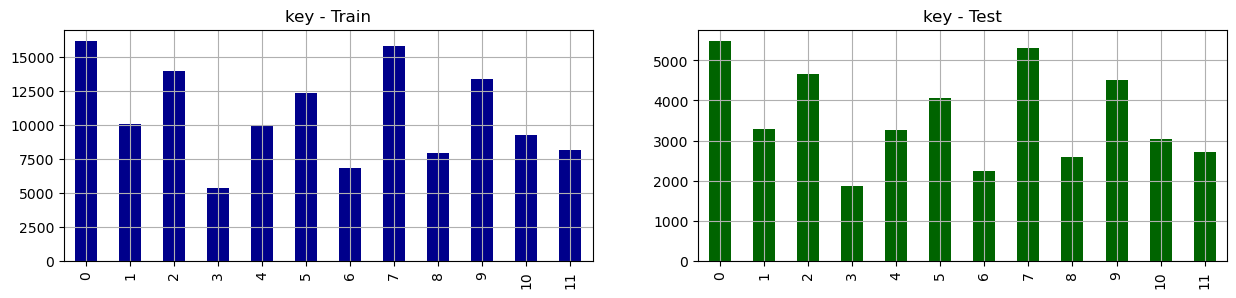

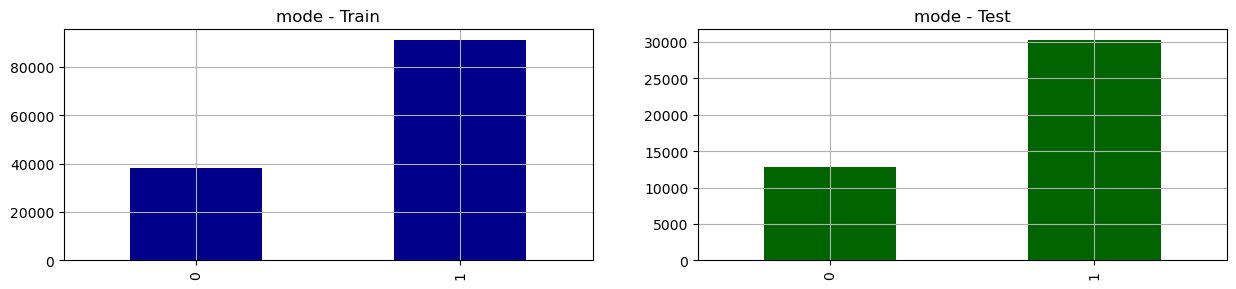

In [12]:
# plot categorical feature distributions (train and test)
for f in features_cat:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].value_counts().sort_index().plot(kind='bar', color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_test[f].value_counts().sort_index().plot(kind='bar', color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

<a id='feature_corr'></a>
# Feature Correlation

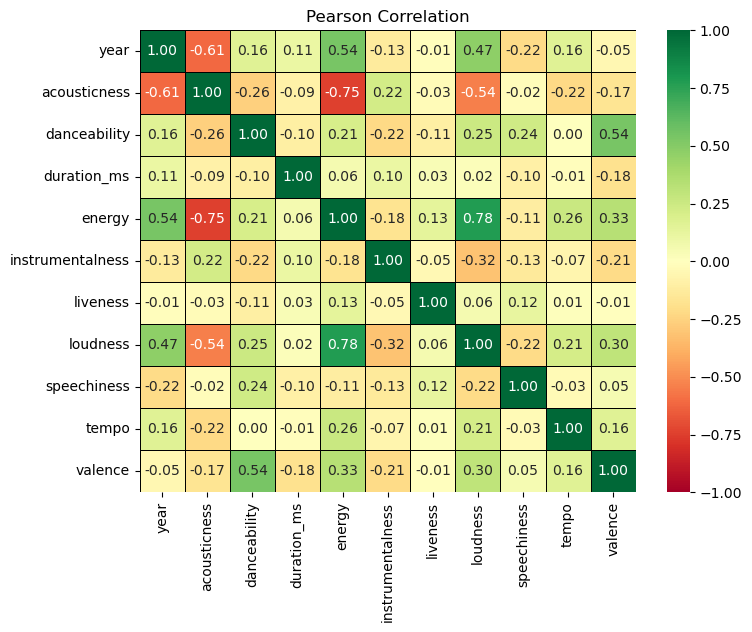

In [13]:
# Pearson correlation
corr_pearson = df_train[features_num].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='=.2f', linewidth=0.5, linecolor='black')
plt.title('Pearson Correlation')
plt.show()

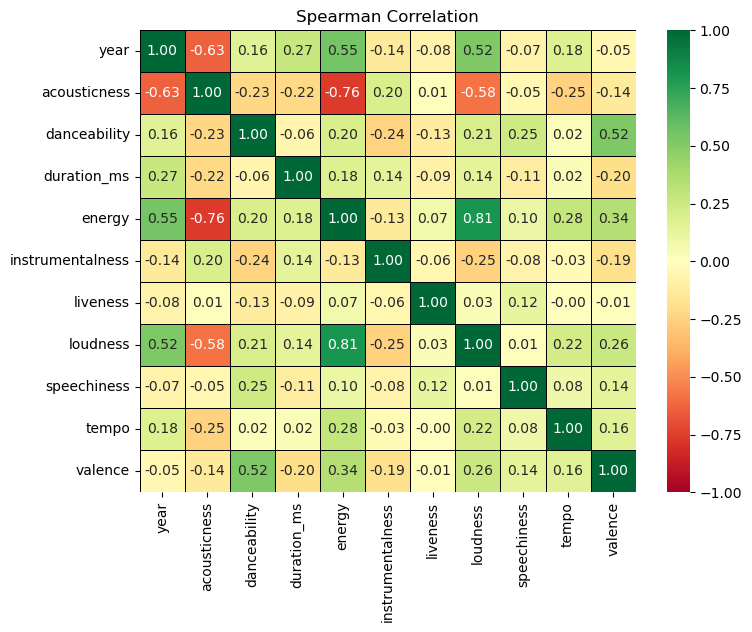

In [14]:
# Spearman (rank) correlation
corr_spearman = df_train[features_num].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='=.2f', linewidth=0.5, linecolor='black')
plt.title('Spearman Correlation')
plt.show()

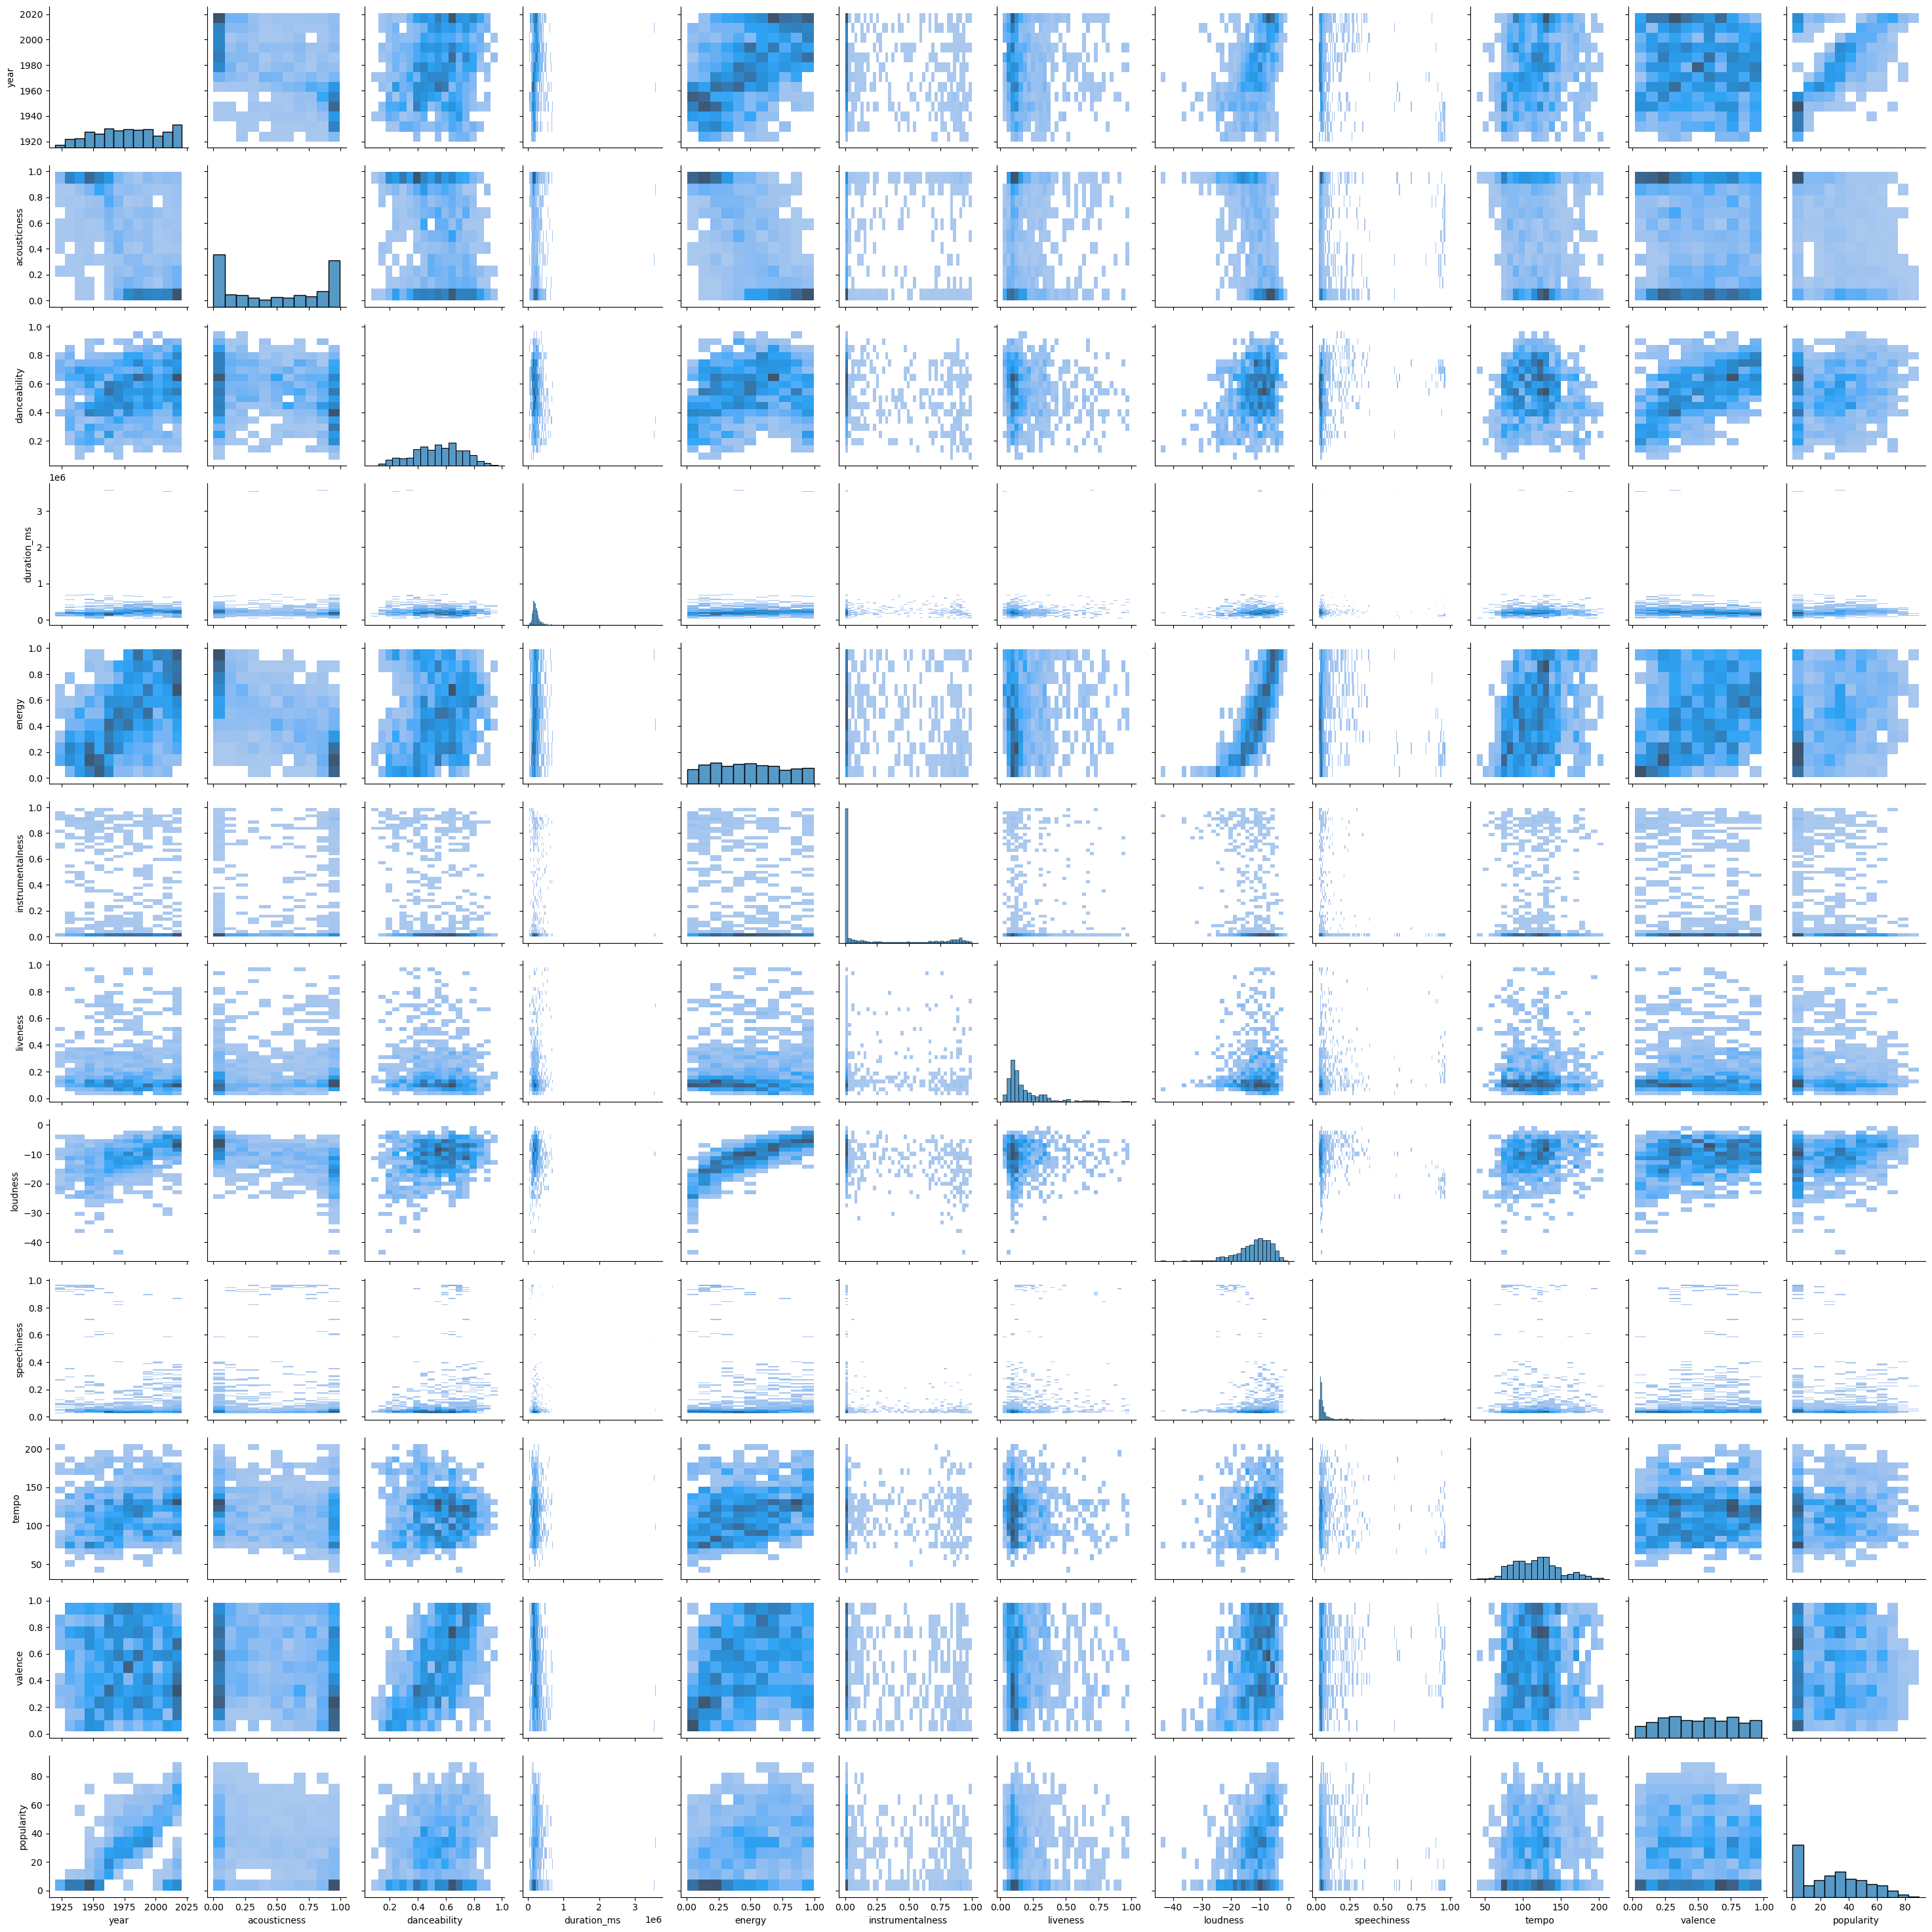

In [15]:
# pairwise plots
df_sample = df_train.sample(n=1000)
sns.pairplot(data=df_sample[features_num + [target]], 
             kind='hist')
plt.show()

<a id='target'></a>
# Target

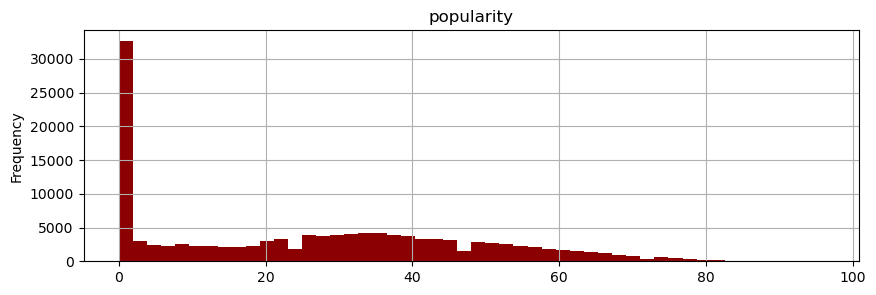

count    129172.000000
mean         25.915539
std          21.876377
min           0.000000
25%           1.000000
50%          26.000000
75%          42.000000
max          96.000000
Name: popularity, dtype: float64


In [16]:
# plot target distribution
plt.figure(figsize=(10,3))
df_train[target].plot(kind='hist', bins=50,
                      color=default_color_3)
plt.title(target)
plt.grid()
plt.show()
# basic stats
print(df_train[target].describe())

### Target vs Features:

In [17]:
# predictors
predictors = features_num + features_cat
print(predictors)

['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'explicit', 'key', 'mode']


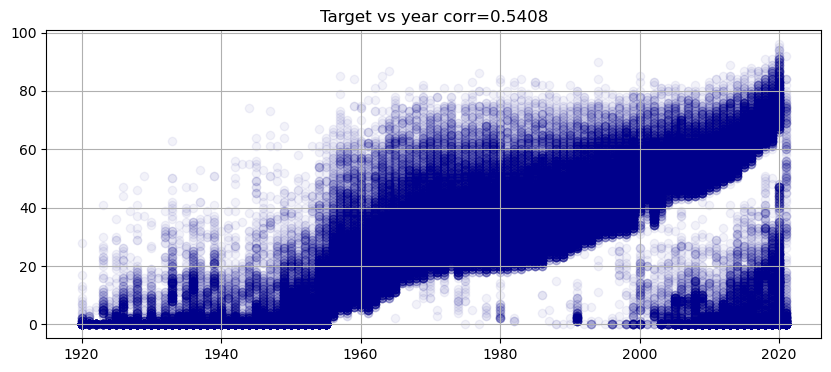

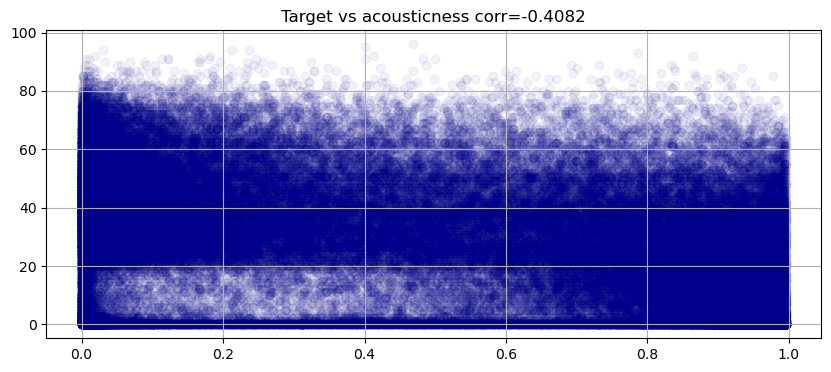

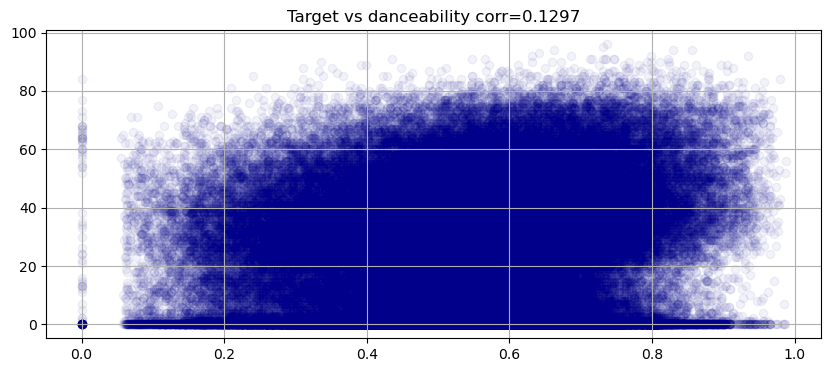

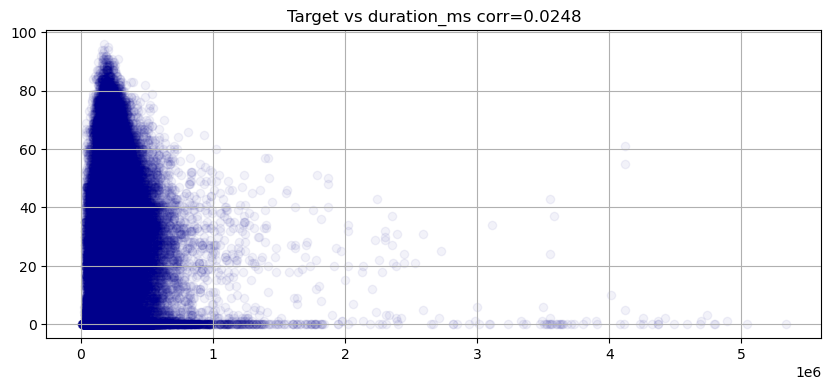

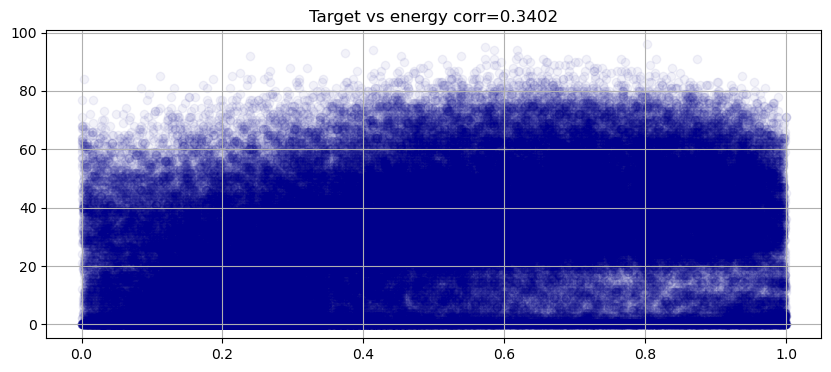

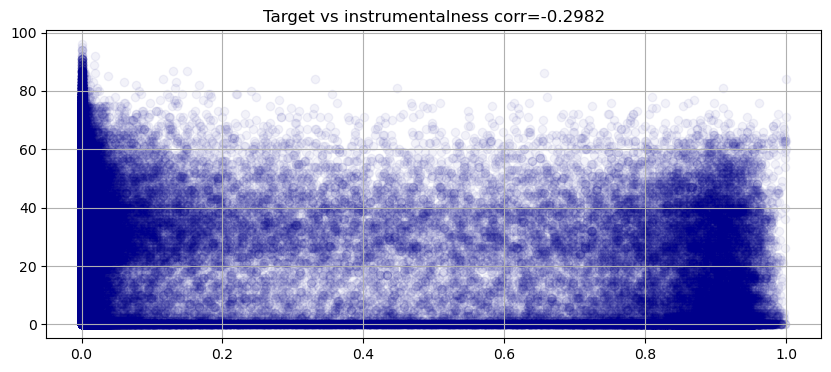

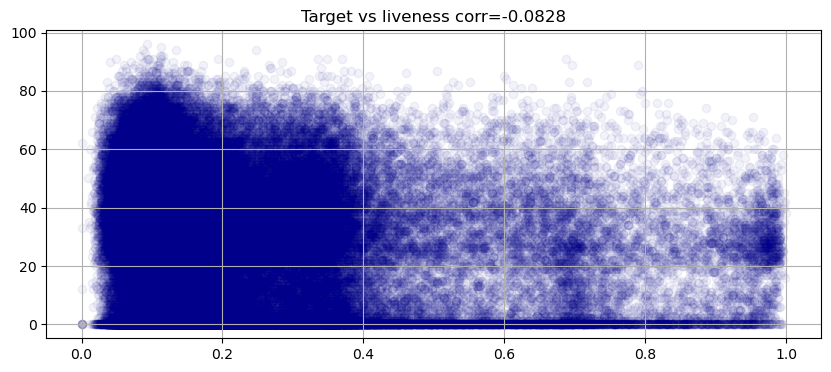

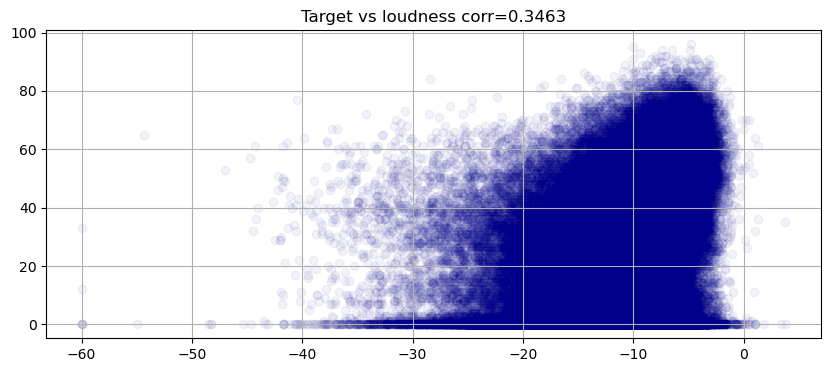

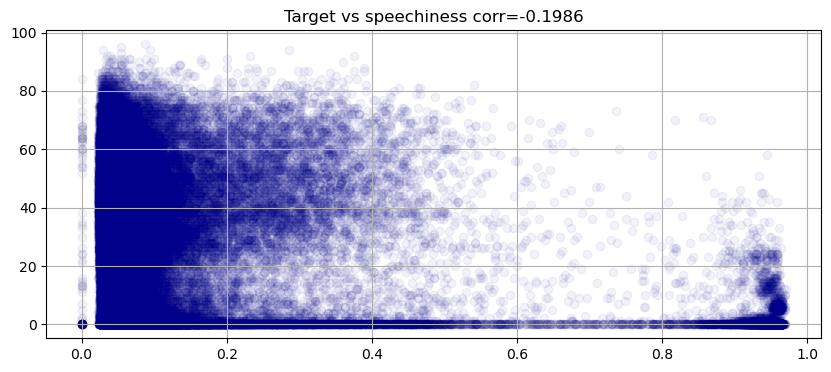

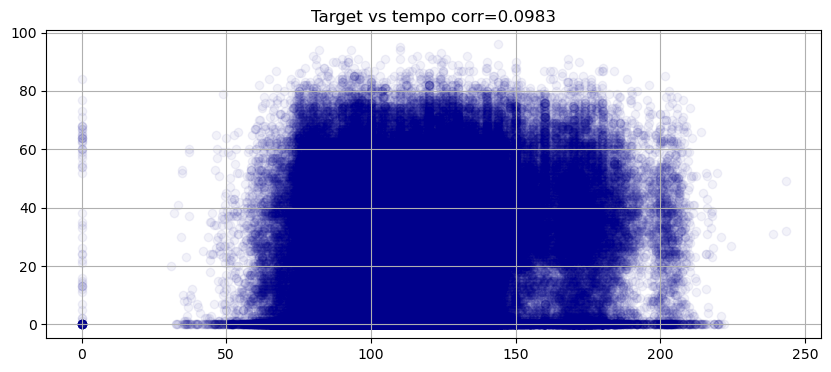

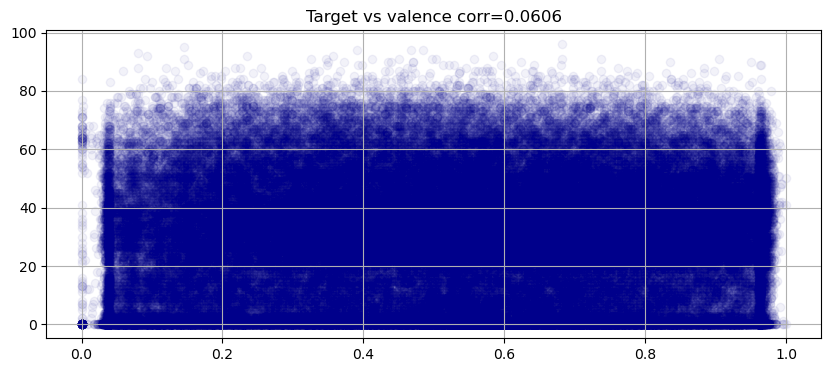

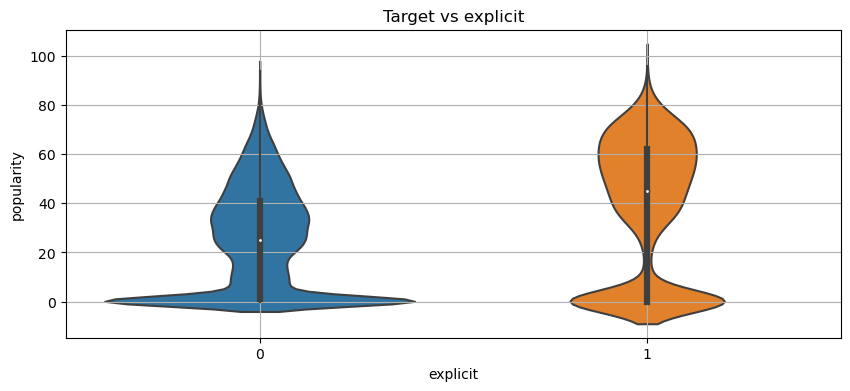

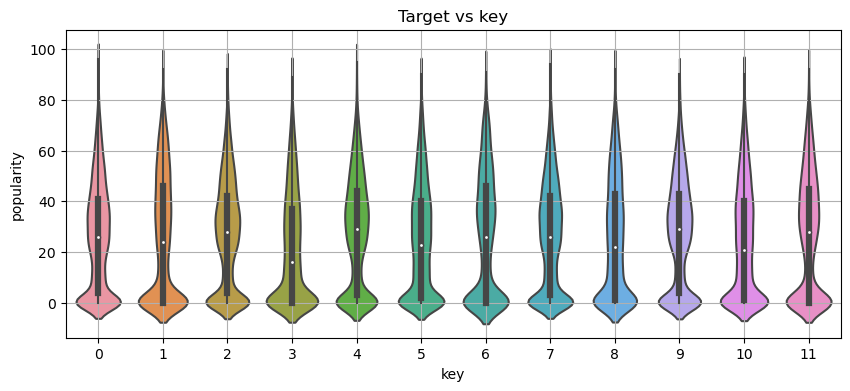

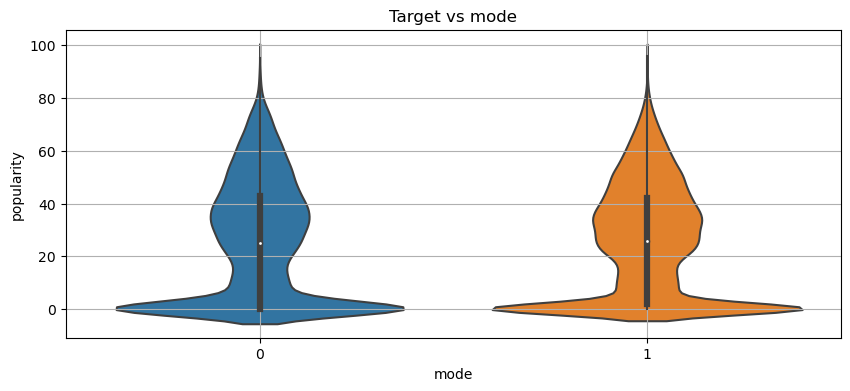

In [18]:
# plot target vs features
max_levels = 20 # limit levels to plot for categorical features

for f in predictors:
    if (f in features_num):
        c = df_train[target].corr(df_train[f])
        plt.figure(figsize=(10,4))
        plt.scatter(df_train[f], df_train[target], 
                    color=default_color_1, alpha=0.05)
        plt.title('Target vs ' + f + ' corr=' + str(np.round(c,4)))
        plt.grid()
        plt.show()
    else:
        plt.figure(figsize=(10,4))
        # pick only to most frequent levels
        most_freq = df_train[f].value_counts().index[0:max_levels].tolist()
        df_temp = df_train[df_train[f].isin(most_freq)]
        sns.violinplot(data=df_temp, x=f, y=target)
        plt.title('Target vs ' + f)
        plt.grid()
        plt.show()

In [22]:
Code by Gaurav Yadav******

SyntaxError: invalid syntax (1343006039.py, line 1)